# ДЗ4 (Оцениваемое)

## Задание №1

1. Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.

2. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.


In [22]:
from pymystem3 import Mystem
# открываем файл
f = open('/Users/tatyanamakerova/Desktop/prog/Harry_Potter_and_the_Sorcerers_Stone.txt', 'r', encoding='utf-8')
text = f.read()
# приводим текст по нижнему регистру
low_text = text.lower() 
# разбиваем текст на слова с помощью токенизатора 
from nltk.tokenize import word_tokenize
separate_words = word_tokenize(low_text)
# очищаем текст от пунктуации 
punctuation = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~„“«»†*—/\-‘’'"
new_text = [word.strip(punctuation) for word in separate_words]
# объединяем текст
united_text = ' '.join(new_text)

In [23]:
# лемматизируем текст
from nltk import WordNetLemmatizer
wnl = WordNetLemmatizer()
lemmatized_text = [wnl.lemmatize(word) for word in united_text]
lemmatized_text = []
# используем теги для частей речи 
for word in united_text:
    word = wnl.lemmatize(word, pos = 'v')
    word = wnl.lemmatize(word, pos = 'n')
    word = wnl.lemmatize(word, pos = 'a')
    lemmatized_text.append(word)

In [24]:
# сохраняем текст в новый файл
new_file = ''.join(lemmatized_text)
with open('/Users/tatyanamakerova/Desktop/prog/new_file_Harry_Potter_and_the_Sorcerers_Stone.txt', 'w', encoding='utf-8') as f:
    f.write(new_file)

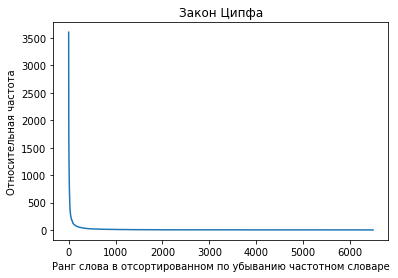

In [27]:
# создаем частотный список
counts = {}
for word in new_file.split():
    if word in counts:
        counts[word] += 1
    else:
        counts[word] = 1
# сортируем его по убыванию
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)

# импортируем модуль для создания графиков и задаем координаты 
import matplotlib.pyplot as plt
Y = [x[1] for x in sorted_counts] 
X = []
for i in range (1, len(counts)+1):
    X.append(i)
    
# рисуем график - последовательно соединяем точки с координатами из X и Y, называем график и оси
plt.plot(X, Y) 
plt.title("Закон Ципфа")
plt.xlabel("Ранг слова в отсортированном по убыванию частотном словаре")
plt.ylabel("Относительная частота")
plt.show()



3. Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

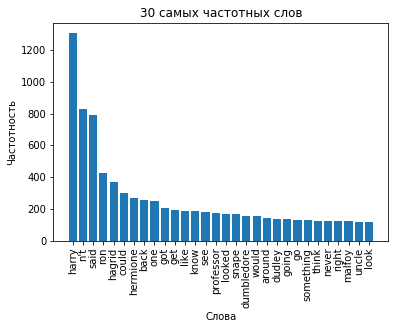

In [30]:
# очищаем текст от стоп-слов 
from nltk.corpus import stopwords
sw = stopwords.words('english')
filtered = [w for w in word_tokenize(new_file) if w not in sw]
# создаем частотный список
bar_counts = {}
for word in filtered:
    if word in bar_counts:
        bar_counts[word] += 1
    else:
        bar_counts[word] = 1
# сортируем его
sorted_bar_counts = sorted(bar_counts.items(), key=lambda x: x[1], reverse=True)
# печатаем первые 30 элементов и строим график
most_common = dict(sorted_bar_counts[:30])
x = most_common.keys()
y = most_common.values()
# поворачиваем слова по оси X, называем график и оси и печатаем его 
plt.xticks(rotation=90)
plt.bar(x, y)
plt.title('30 самых частотных слов')
plt.ylabel('Частотность')
plt.xlabel('Слова')
plt.show()